<a href="https://colab.research.google.com/github/gitflai/DDS4/blob/main/Aula_11_DDS4_Pre_processamendo_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

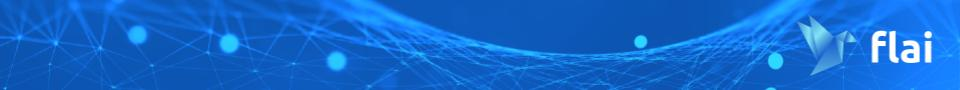

## **Aula 11 - DDS4 - Pre-processamendo de Dados**

---
## **Importação e Preparação dos Dados**

In [ ]:
# via github 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/Churn_Modelling.csv'
dados = pd.read_csv(url)
dados.head()

In [ ]:
dados['Surname'].value_counts()

In [ ]:
X = dados.drop(['Exited'], axis = 1) 
y = dados['Exited']

In [ ]:
X.head()

## **Análise Exploratória dos Dados** 

In [ ]:
# instalando biblioteca de visualização

!pip install sweetviz 

In [ ]:
import sweetviz as sv

In [ ]:
eda = sv.analyze(source = dados, 
                 target_feat = 'Exited')

In [ ]:
eda.show_notebook()

---
## **Pré-processamento para Machine Learning**

Em Machine Learning, é comum utilizarmos conjuntos de dados 100% numéricos para que fique adequado para qualquer modelo que se deseje utilizar. Isso significa que não pode haver dados faltantes e nem variáveis do tipo string (ou outros tipos que não sejam numéricos). 



---
### **PP1 - Descarte de variáveis não importantes**

In [ ]:
# dropando as variaveis de interesse
dados.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)


In [ ]:
dados.head()

---
### **PP2 - Verificação de dados faltantes**

In [ ]:
dados.isnull().sum()

In [ ]:
import missingno as missing

In [ ]:
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

---
### **PP3 - Categorização de variáveis continuas**

In [ ]:
dados['Balance'].plot(kind = 'hist', edgecolor = 'black')

In [ ]:
dados[dados['Balance'] > 0]['Balance'].plot(kind = 'hist', edgecolor = 'black')

In [ ]:
dados[dados['Balance'] > 0]['Balance'].describe()

In [ ]:
def auxiliar(x):
    if x == 0:
        return 'Zerada'
    elif x < 100000:
        return 'Até 100k'
    elif x < 150000:
        return '100k - 150k'
    else:
        return '150k+'

dados['Balance'] = dados['Balance'].apply(auxiliar)
dados.head()

In [ ]:
dados['Balance'].value_counts().plot(kind ='pie')

---
### **PP4 - Agrupamento de Categorias**

In [ ]:
dados.head()

In [ ]:
dados['Tenure'].value_counts()

In [ ]:
def auxiliar(x):
    if x <= 3:
        return '0-3'
    elif x <= 6:
        return '4-6'
    else:
        return '7-10'

dados['Tenure'] = dados['Tenure'].apply(auxiliar)

In [ ]:
dados['Tenure'].value_counts().plot(kind = 'pie');

In [ ]:
dados['NumOfProducts'].value_counts()

In [ ]:
def auxiliar(x):
    if x == 1:
        return 'NumProd1'
    else:
        return 'NumProd2+'

dados['NumOfProducts'] = dados['NumOfProducts'].apply(auxiliar)

In [ ]:
dados['NumOfProducts'].value_counts().plot(kind = 'pie');

In [ ]:
dados.head()

---
### **PP5 - Dummyficação de Variáveis**

In [ ]:
pd.get_dummies(dados['Tenure'])

In [ ]:
variaveis_cat = ['Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts']
dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first = True)

In [ ]:
dados.head()

---
### **PP6 - Controlando a Escala das Variáveis Contínuas**

In [ ]:
dados['CreditScore'].plot(kind = 'hist')

In [ ]:
dados['CreditScore'] = dados['CreditScore']/1000 

In [ ]:
dados['CreditScore'].plot(kind = 'hist')

---

In [ ]:
dados['Age'].plot(kind = 'hist');

In [ ]:
import numpy as np
media = np.mean(dados['Age'])
desvio = np.std(dados['Age'])
dados['Age'] = (dados['Age'] - media)/desvio

In [ ]:
dados['Age'].plot(kind = 'hist');

---

In [ ]:
dados['EstimatedSalary'].plot(kind = 'hist');

In [ ]:
dados['EstimatedSalary'] = dados['EstimatedSalary']/100000

In [ ]:
dados['EstimatedSalary'].plot(kind = 'hist');

In [ ]:
dados.head()

In [ ]:
dados.describe()

## **Revendo a EDA**

In [ ]:
eda = sv.analyze(source = dados, target_feat = 'Exited')
eda.show_notebook()

## **Machine Learning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [ ]:
X = dados.drop('Exited', axis = 1)
y = dados['Exited']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 2)',
                        'Random Forest (arvs = 50, prof = 3)',
                        'Random Forest (arvs = 100, prof = 2)', 
                        'Random Forest (arvs = 100, prof = 3)']

resultados0 = {}

validacao = StratifiedKFold(n_splits = 10)


for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T


In [ ]:
resultados.sort_values(by = 'f1-score', ascending = False)

---
## **Exercícios Propostos**

- Verifique o desempenho de algumas combinações de modelos. Varie entre as combinações 'hard' e 'soft'!

---
**_#itstimetoflai_** 